In [59]:
%matplotlib inline
import h5py
import os
import time

# import seaborn as sns
import numpy as np
#import plotly.express as px

#from fpdf import FPDF

from matplotlib import pyplot as plt
from importlib import reload

from scipy.optimize import curve_fit
np.set_printoptions(suppress=False)

In [60]:
file_dict= {
    "delme"     : "/Users/swasti/Library/CloudStorage/Box-Box/ComPair/Pre_full-system_TVAC_I&T/r192_Cs137_Hr1_20230308/2023-03-08_1024_9Layers_Cs137.CUD.h5",
    "r300" : "/Users/swasti/Library/CloudStorage/Box-Box/ComPair/Tests_and_Debug/testing-cud2rr-acd/r300_cud_combined.CUD.h5",
}

In [61]:
file = h5py.File(file_dict["r300"],'r')

In [62]:
file['Events'].keys()

<KeysViewHDF5 ['ACD', 'CZT', 'CsI', 'TKR', 'TM']>

In [63]:
# EventIds
tkr_eventid = file['Events/TKR/EventID'][...]

czt_eventida = file['Events/CZT/EventID'][...]
czt_eventid = czt_eventida[np.where(czt_eventida>0)]

csi_eventid = file['Events/CsI/EventID/EventID'][...]

In [64]:
# Event Times
tkr_time = file['Events/TKR/EventTime'][...]

czt_timeb = file['Events/CZT/EventTime'][...]
czt_time = czt_timeb[np.where(czt_eventida>0)]

csi_time= file['Events/CsI/time/UTC'][...]

In [65]:
print(f"{tkr_time[10]:.2e}")
print(f"{czt_time[10]:.2e}")
print(f"{csi_time[10]:.2e}")

1.69e+18
1.69e+09
1.69e+18


In [66]:
(np.array(czt_time)/1e9)[0]

1.692624721

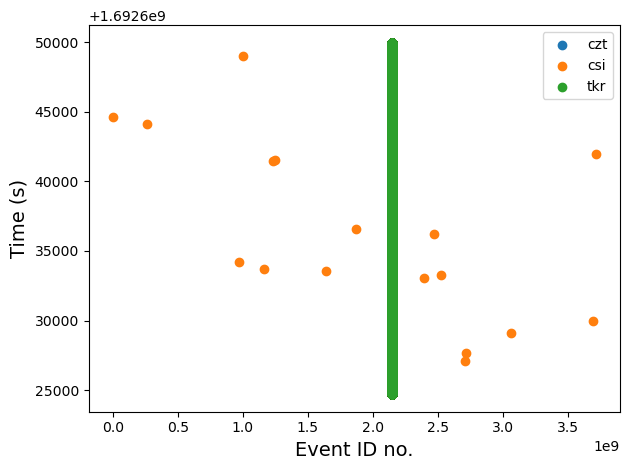

In [67]:
plt.scatter(czt_eventid, (np.array(czt_time)), label='czt')
plt.scatter(csi_eventid, np.array(csi_time)/1e9, label ='csi')
plt.scatter(tkr_eventid, np.array(tkr_time)/1e9, label='tkr')
#lt.rcParams["figure.figsize"] = [6, 8]
plt.ylabel("Time (s)", size=14)
plt.xlabel("Event ID no.", size=14)
plt.tight_layout()
plt.legend()
# plt.ylim(0,2)
# plt.savefig("time_vs_eventid.jpeg")
plt.show()

In [69]:
trk_time_test = np.array(tkr_time)
trk_strtime = trk_time_test[0]
tkr_newtime = trk_time_test- trk_strtime
plt.plot(tkr_newtime/1e9, label='tkr', linesytle[''])

SyntaxError: positional argument follows keyword argument (879659967.py, line 4)

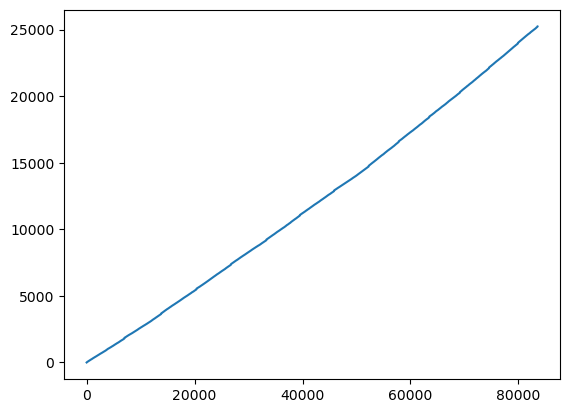

In [51]:
csi_time_test = np.array(csi_time)
csi_strtime = csi_time_test[0]
csi_newtime = csi_time_test- csi_strtime
plt.plot(csi_newtime/1e9, label='csi')

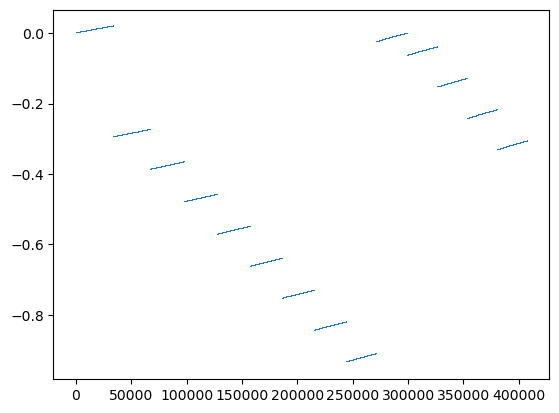

In [58]:
czt_time_test = np.array(czt_time)
czt_strtime = czt_time_test[0]
czt_newtime = czt_time- czt_strtime
plt.plot(czt_newtime, label='czt', linestyle ="none", marker=',')

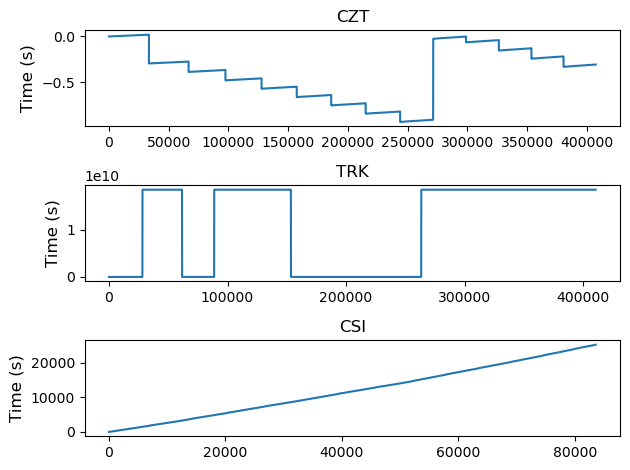

In [33]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(3, 1)

# Create a list of arrays
arrays = [czt_newtime, tkr_newtime/1e9, csi_newtime/1e9]

# Labels for each subplot
labels = ['CZT', 'TRK', 'CSI']
# Set the y-axis limits
# y_min = 0
# y_max = 3800
# y_gap = 1200

# Iterate through the subplots and arrays, and plot each one with a label
for i, ax in enumerate(axs.flat):
    ax.plot(arrays[i])
    ax.set_title(labels[i])
    ax.set_ylabel('Time (s)', fontsize=12)

    # # Set y-axis limits
    # ax.set_ylim(y_min, y_max)
    
    # Set y-axis ticks with the specified gap
    # ax.set_yticks(range(y_min, y_max + 1, y_gap))

# Adjust the layout for better spacing
plt.tight_layout()
# fig.supylabel('Time (s)', fontsize=12, labelpad=15)
# Show the plot
plt.show()